In [2]:
from datasets import load_dataset


# Load and inspect dataset


In [3]:
import numpy as np

# load data
data_classes_two = np.load('Data/classes_two.npy', allow_pickle=True)
data_classes = np.load('Data/classes.npy', allow_pickle=True)


In [33]:
data_classes, data_classes_two

(array(['hatespeech', 'normal', 'offensive'], dtype='<U10'),
 array(['non-toxic', 'toxic'], dtype=object))

In [4]:
import json

with open('Data/dataset.json', 'r') as f:
    data = json.load(f)

In [3]:
with open('Data/post_id_divisions.json', 'r') as f:
    post_id_divisions = json.load(f)

In [5]:
data_classes_two = np.load('Data/classes_two.npy', allow_pickle=True)
examples_binary = [
    (" ".join(data[k]['post_tokens']), label)
    for k, label in zip(data.keys(), data_classes_two)
]


In [8]:
examples_binary

[('i dont think im getting my baby them white 9 he has two white j and nikes not even touched',
  'non-toxic'),
 ('we cannot continue calling ourselves feminists if the rights of all womxn arent addressed yes to a sexual offences public list but will a trans lesbian bisexual and queer womxn be able to enter their information on the reporting sheet gender forum',
  'toxic')]

In [10]:
print(f"Number of samples: {len(data)}")
# View a sample
sample_key = list(data.keys())[4]
print(json.dumps(data[sample_key], indent=2))

Number of samples: 20148
{
  "post_id": "1179085312976445440_twitter",
  "annotators": [
    {
      "label": "hatespeech",
      "annotator_id": 4,
      "target": [
        "Caucasian",
        "Women"
      ]
    },
    {
      "label": "hatespeech",
      "annotator_id": 2,
      "target": [
        "Women",
        "Caucasian"
      ]
    },
    {
      "label": "offensive",
      "annotator_id": 3,
      "target": [
        "Women",
        "Caucasian"
      ]
    }
  ],
  "rationales": [
    [
      0,
      1,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      1,
      1,
      1,
      0
    ],
    [
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      1,
      1,
      1,
      1
    ],
    [
      0,
      1,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
  

In [6]:
from collections import Counter

examples = []

for k, v in data.items():
    text = " ".join(v['post_tokens']) 
    
    # Use majority vote to decide the label
    if 'annotators' in v and v['annotators']:
        labels = [ann['label'] for ann in v['annotators']] # Get labels from annotators
        label_counts = Counter(labels) 
        majority_label = label_counts.most_common(1)[0][0] # Get the most common label
        examples.append((text, majority_label))


In [14]:
len(examples)

20148

In [15]:
examples[:5]

[('i dont think im getting my baby them white 9 he has two white j and nikes not even touched',
  'normal'),
 ('we cannot continue calling ourselves feminists if the rights of all womxn arent addressed yes to a sexual offences public list but will a trans lesbian bisexual and queer womxn be able to enter their information on the reporting sheet gender forum',
  'normal'),
 ('nawt yall niggers ignoring me', 'normal'),
 ('<user> i am bit confused coz chinese ppl can not access twitter thn how this ching chong using it i think he pakistani 🤔 🤔 🤔',
  'hatespeech'),
 ('this bitch in whataburger eating a burger with no top bun and holding it palm up i hate white bitches',
  'hatespeech')]

In [16]:
# show some examples for each label
from collections import defaultdict

label_examples = defaultdict(list)
for text, label in examples:
    label_examples[label].append(text)
    
for label, texts in label_examples.items():
    print(f"Label: {label}")
    print(f"Examples: {texts[:3]}")
    

Label: normal
Examples: ['i dont think im getting my baby them white 9 he has two white j and nikes not even touched', 'we cannot continue calling ourselves feminists if the rights of all womxn arent addressed yes to a sexual offences public list but will a trans lesbian bisexual and queer womxn be able to enter their information on the reporting sheet gender forum', 'nawt yall niggers ignoring me']
Label: hatespeech
Examples: ['<user> i am bit confused coz chinese ppl can not access twitter thn how this ching chong using it i think he pakistani 🤔 🤔 🤔', 'this bitch in whataburger eating a burger with no top bun and holding it palm up i hate white bitches', 'laura loomer raped me while screaming at me in her disgusting kike language and said we must exterminate the goyim laura loomer loomergate']
Label: offensive
Examples: ['nogs jews and dykes how enriching', 'all of my exes were cute but they were hoes i guess i only attract fly looking thots 😴', '<user> condoning drug use not kike at

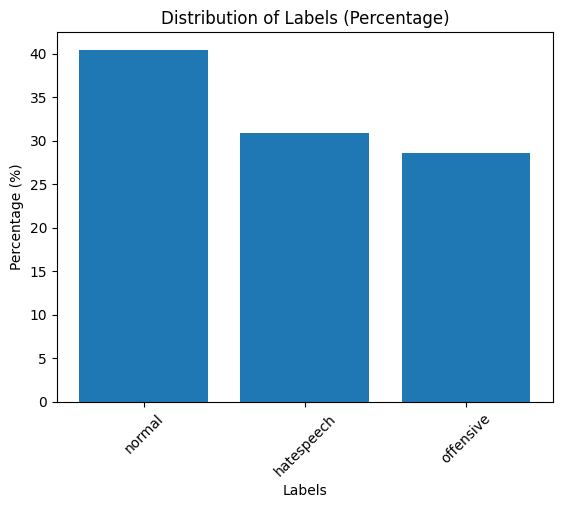

In [17]:
# See distribution of labels as percentages
import matplotlib.pyplot as plt

label_counts = Counter(label for _, label in examples)
total = sum(label_counts.values())
label_percentages = {label: (count / total) * 100 for label, count in label_counts.items()}

plt.bar(label_percentages.keys(), label_percentages.values())
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Labels (Percentage)')
plt.xticks(rotation=45)
plt.show()

Total examples: 20148
Unanimous (all annotators agree): 9845 (48.86%)
Two-label disagreement: 9384 (46.58%)
Three-label disagreement: 919 (4.56%)


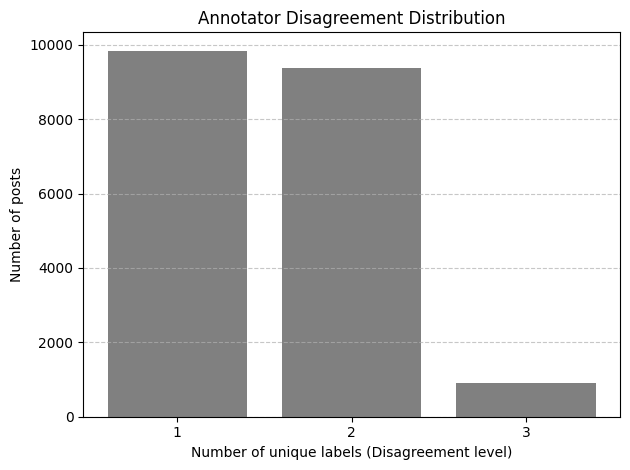


Post ID: 14971751_gab
Disagreement level: 3
Label counts: Counter({'normal': 1, 'offensive': 1, 'hatespeech': 1})
Text: i have upgraded your status from gangsta to playa this nigger here understands what real issues are due to his objectivity and foresight

Post ID: 1179080731642990592_twitter
Disagreement level: 3
Label counts: Counter({'offensive': 1, 'normal': 1, 'hatespeech': 1})
Text: <user> <user> <user> <user> <user> <user> <user> <user> do not be 😂 i do not need a faggot here for me u sinner 😔

Post ID: 25605196_gab
Disagreement level: 3
Label counts: Counter({'normal': 1, 'offensive': 1, 'hatespeech': 1})
Text: last nights black lighting show ov yea such miscasting jewy jewnose is the white guy forcing <number> niglets to deal drugs but blond hergerman is the comet pizza guy keeping powerful niggerette girls trapped in his basement pizzagate seriously visit dc sometime <user> <user> <user> <user> <user> ‍

Post ID: 1179083428924231680_twitter
Disagreement level: 3
Label count

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
import json

def compute_annotator_disagreement(dataset, verbose=False, return_top_n=0, plot=False):
    """
    Compute the number of unique labels assigned by annotators for each post,
    and optionally plot disagreement distribution.
    
    Args:
        dataset (dict): Loaded JSON dataset
        verbose (bool): Print summary stats
        return_top_n (int): If >0, return top N most disagreed examples
        plot (bool): If True, plot a histogram of disagreement levels

    Returns:
        disagreement_stats (list of tuples): (post_id, disagreement_count, label_counter)
        top_disagreements (optional): top N posts with highest disagreement
    """
    disagreement_stats = []

    for post_id, content in dataset.items():
        labels = [ann['label'] for ann in content.get('annotators', [])]
        label_counter = Counter(labels)
        disagreement_count = len(label_counter)
        disagreement_stats.append((post_id, disagreement_count, label_counter))

    if verbose:
        total = len(disagreement_stats)
        unanimous = sum(1 for _, c, _ in disagreement_stats if c == 1)
        mild_disagreement = sum(1 for _, c, _ in disagreement_stats if c == 2)
        full_disagreement = sum(1 for _, c, _ in disagreement_stats if c >= 3)

        print(f"Total examples: {total}")
        print(f"Unanimous (all annotators agree): {unanimous} ({unanimous/total:.2%})")
        print(f"Two-label disagreement: {mild_disagreement} ({mild_disagreement/total:.2%})")
        print(f"Three-label disagreement: {full_disagreement} ({full_disagreement/total:.2%})")

    if plot:
        disagreement_counts = [c for _, c, _ in disagreement_stats]
        count_dist = Counter(disagreement_counts)
        plt.bar(count_dist.keys(), count_dist.values(), color='gray')
        plt.xlabel("Number of unique labels (Disagreement level)")
        plt.ylabel("Number of posts")
        plt.title("Annotator Disagreement Distribution")
        plt.xticks([1, 2, 3])
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    if return_top_n > 0:
        top_disagreements = sorted(disagreement_stats, key=lambda x: -x[1])[:return_top_n]
        return disagreement_stats, top_disagreements

    return disagreement_stats



with open('Data/dataset.json', 'r') as f:
    dataset = json.load(f)

disagreement_stats, top_disagreements = compute_annotator_disagreement(dataset, verbose=True, return_top_n=5, plot=True)

# Print top 5 most disagreed examples
for post_id, count, label_counts in top_disagreements:
    print(f"\nPost ID: {post_id}")
    print(f"Disagreement level: {count}")
    print(f"Label counts: {label_counts}")
    print(f"Text: {' '.join(dataset[post_id]['post_tokens'])}")



##### Still have 50% of annotators that don't agree fully

In [8]:
from collections import Counter


def resolve_disagreements_custom(dataset, disagreement_stats):
    resolved = []
    counter_unanimous = 0
    counter_hatespeech = 0
    counter_off_normal = 0
    counter_skipped = 0

    for post_id, disagreement, label_counts in disagreement_stats:
        if disagreement == 3:
            counter_skipped += 1
            continue  # skip level 3 disagreements

        text = " ".join(dataset[post_id]['post_tokens'])
        labels = list(label_counts.elements())
        label_set = set(label_counts.keys())

        # Case 1: unanimous
        if disagreement == 1:
            counter_unanimous += 1
            resolved_label = labels[0]

        # Case 2: offensive vs hatespeech → resolve as hatespeech
        elif disagreement == 2 and label_set == {"offensive", "hatespeech"}:
            counter_hatespeech += 1
            resolved_label = "hatespeech"

        # Case 3: normal vs offensive or normal vs hatespeech → majority
        else:
            counter_off_normal += 1
            resolved_label = Counter(labels).most_common(1)[0][0]

        resolved.append((text, resolved_label))

    print(f"Unanimous: {counter_unanimous}, Offensive vs Hatespeech: {counter_hatespeech}, Normal vs Other: {counter_off_normal}, Skipped (3-label): {counter_skipped}")
    return resolved


resolved_examples_custom = resolve_disagreements_custom(dataset, disagreement_stats)

Unanimous: 9845, Offensive vs Hatespeech: 3916, Normal vs Other: 5468, Skipped (3-label): 919


In [9]:
# combine hatespeech and offensive as toxic non-toxic
data_binary = [
    (text, "toxic" if label in ["hatespeech", "offensive"] else "non-toxic")
    for text, label in resolved_examples_custom
]

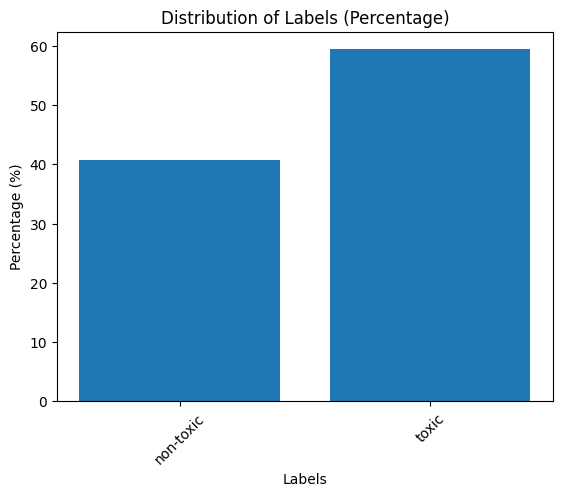

In [21]:
import matplotlib.pyplot as plt

label_counts = Counter(label for _, label in data_binary)
total = sum(label_counts.values())
label_percentages = {label: (count / total) * 100 for label, count in label_counts.items()}

plt.bar(label_percentages.keys(), label_percentages.values())
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Labels (Percentage)')
plt.xticks(rotation=45)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Split original clean data
train_clean, test_clean = train_test_split(data_binary, test_size=0.2, random_state=42)

In [11]:
len(train_clean), len(test_clean)  

(15383, 3846)

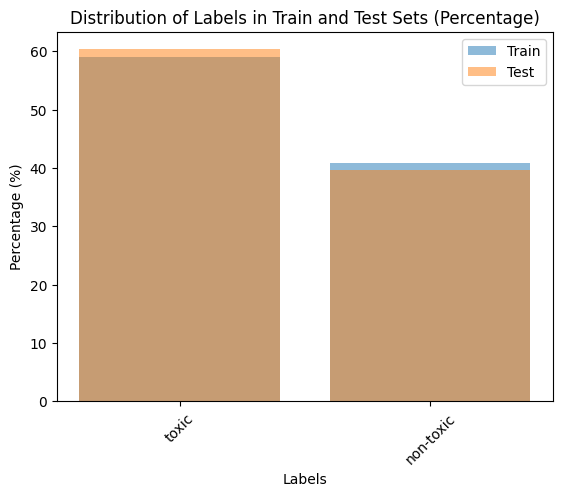

In [25]:
# see distribution of labels in train and test sets
train_label_counts = Counter(label for _, label in train_clean)
test_label_counts = Counter(label for _, label in test_clean)
train_total = sum(train_label_counts.values())
test_total = sum(test_label_counts.values())
train_label_percentages = {label: (count / train_total) * 100 for label, count in train_label_counts.items()}
test_label_percentages = {label: (count / test_total) * 100 for label, count in test_label_counts.items()}

plt.bar(train_label_percentages.keys(), train_label_percentages.values(), alpha=0.5, label='Train')
plt.bar(test_label_percentages.keys(), test_label_percentages.values(), alpha=0.5, label='Test')
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Labels in Train and Test Sets (Percentage)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

##### Imbalance... oversample non-toxic samples? apply cross-entropy loss

# Augmentation strategy

Goal: Train a model that performs well both on clean text and on adversarial variants. 

The idea is to augment the dataset so the model learns that "hate" and "h8" (or “hаtе”) mean the same thing in this context.

In [12]:
import requests
from collections import defaultdict
import random
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from pyleetspeak.LeetSpeaker import LeetSpeaker


In [13]:
def build_homoglyph_map():
    url = "https://www.unicode.org/Public/security/latest/confusables.txt" 
    response = requests.get(url) # Fetch the confusables data
    raw_text = response.text     # Get the text content

    homoglyph_map = defaultdict(list) 

    for line in raw_text.splitlines():
        if line.startswith('#') or not line.strip(): # Skip comments and empty lines
            continue
        try:
            src_hex, target_hex, *_ = line.split(';') # 
            src_char = chr(int(src_hex.strip(), 16))
            target_chars = ''.join([chr(int(h, 16)) for h in target_hex.strip().split()])

            # We only want visually similar substitutions that map to 1 character
            if len(src_char) == 1 and len(target_chars) == 1:
                ascii_base = target_chars.lower()
                if ascii_base.isascii() and ascii_base.isalnum():
                    homoglyph_map[ascii_base].append(src_char)
        except Exception as e:
            continue  # skip malformed lines

    # Convert defaultdict to normal dict and deduplicate entries
    homoglyph_map = {k: list(set(v)) for k, v in homoglyph_map.items()}

    return homoglyph_map



def random_homoglyph_substitution(text, homoglyph_map, prob=0.4):
    new_text = ""
    for char in text:
        if char.isalpha() and char.lower() in homoglyph_map and random.random() < prob:
            replacement = random.choice(homoglyph_map[char.lower()])
            new_text += replacement
        else:
            new_text += char
    return new_text


def smart_homoglyph_substitution(text, homoglyph_map, target_words, prob=0.5):
    tokens = text.split()
    new_tokens = []

    for token in tokens:
        if any(word in token.lower() for word in target_words) and random.random() < prob:
            new_token = ''.join(
                random.choice(homoglyph_map[c.lower()]) if c.lower() in homoglyph_map and random.random() < 0.5 else c
                for c in token
            )
            new_tokens.append(new_token)
        else:
            new_tokens.append(token)

    return ' '.join(new_tokens)

def leet_some_words(text, leeter, word_prob=0.6):
    """
    Randomly leet some words in the text based on a probability.
    """
    words = text.split()
    new_words = []
    for word in words:
        if random.random() < word_prob:
            new_words.append(leeter.text2leet(word))
        else:
            new_words.append(word)
    return ' '.join(new_words)

def augment_text(text, leeter, homoglyph_map, target_words=None):
    mode = random.choice(["leet", "homoglyph", "both"])

    if mode == "leet":
        text = leet_some_words(text, leeter)
    elif mode == "homoglyph":
        text = smart_homoglyph_substitution(text, homoglyph_map, target_words or [])
    elif mode == "both":
        text = leet_some_words(text, leeter)
        text = smart_homoglyph_substitution(text, homoglyph_map, target_words or [])
    # mode == "none": return as is
    return text


# def augment_text(text, leeter, homoglyph_map):
#     mode = random.choice(["leet", "homoglyph", "both", "none"])

#     # mode = random.choices(["leet", "homoglyph", "both", "none"], 
#     #                      weights=[proba_leet, proba_leet_homoglyph, proba_both, proba_non], 
#     #                      k=1)[0]
    
#     if mode == "leet":
#         text = leeter.text2leet(text)
#     elif mode == "homoglyph":
#         text = random_homoglyph_substitution(text, homoglyph_map)
#     elif mode == "both":
#         text = leeter.text2leet(text)
#         text = random_homoglyph_substitution(text, homoglyph_map)
#     return text


In [14]:
homoglyph_map = build_homoglyph_map()
leeter = LeetSpeaker(change_prb=0.2, change_frq=0.5, mode="basic", seed=None, verbose=False)

augmented_train = [
    (augment_text(text, leeter, homoglyph_map=homoglyph_map), label)
    for text, label in train_clean
]


In [15]:
# see if the augmentation worked
for i in range(5):
    original_text, original_label = train_clean[i]
    augmented_text, augmented_label = augmented_train[i]
    print(f"Original: {original_text} (Label: {original_label})")
    print(f"Augmented: {augmented_text} (Label: {augmented_label})")
    

Original: his english periscope was awful apparently his chinese one was much better and had 1 6 m watching i do not speak gookanese though so be funny to see how this plays out with chink whales putting stops every <number> (Label: toxic)
Augmented: his english periscope w@s 4wf_l app@rently his chinese one was much better and had 1 6 m watching i do not speak g0okanese though so b3 funny t0 see how this plays out with ch1nk whales putting st0ps every <number> (Label: toxic)
Original: if somebody is not white than they are going to be rejected by wn on the grounds they are not white women in general need pushed out of leadership positions in our movement and she not doing good work she setting a very bad precedent for our future actually (Label: toxic)
Augmented: if s0mebody is n0t white than they are going to b3 rejected by wn on the gr0unds they are not white women in general need pushed out of leadership positions in our movement and she n0t d0ing good work she s3tt1ng a very bad p

# Model

In [16]:
portion_to_augment = 0.3  # Augment only 30% of train
n_augmented = int(len(train_clean) * portion_to_augment)

subset_to_augment = random.sample(train_clean, n_augmented)

train_aug = [(augment_text(text, leeter, homoglyph_map=homoglyph_map), label) for text, label in subset_to_augment]

# Final training set = clean + noisy subset
train_final = train_clean + train_aug
test_final = test_clean                # Only clean examples for fair testing



In [17]:
label_map = {'non-toxic': 0, 'toxic': 1}

In [18]:
# Format for Hugging Face

from datasets import Dataset

train_dataset = Dataset.from_dict({
    "text": [text for text, label in train_final],
    "label": [label_map[label] for text, label in train_final]
})

test_dataset = Dataset.from_dict({
    "text": [text for text, label in test_final],
    "label": [label_map[label] for text, label in test_final]
})



In [63]:
# Tokenize the dataset 

tokenizer = AutoTokenizer.from_pretrained('tum-nlp/bert-hateXplain')

def tokenize(example):
    ''''
    Tokenizes the input text using the provided tokenizer.
    '''
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128) 

train_tokenized = train_dataset.map(tokenize, batched=True)
test_tokenized = test_dataset.map(tokenize, batched=True)


Map:   0%|          | 0/19997 [00:00<?, ? examples/s]

Map:   0%|          | 0/3846 [00:00<?, ? examples/s]

In [64]:
# Fine-tune the model
from transformers import TrainingArguments, Trainer, AutoModelForSequenceClassification
from transformers import EarlyStoppingCallback
from sklearn.metrics import accuracy_score, f1_score


def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    acc = accuracy_score(labels, preds)
    f1_macro = f1_score(labels, preds, average="macro")
    
    return {
        "accuracy": acc,
        "f1_macro": f1_macro
    }


model = AutoModelForSequenceClassification.from_pretrained(
    'tum-nlp/bert-hateXplain', num_labels=2
)

# training_args = TrainingArguments(
#     output_dir="./results",
#     # evaluation_strategy="epoch",
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=5,
#     logging_dir="./logs",
#     # save_strategy="no" 
    
#     load_best_model_at_end=True,
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     metric_for_best_model="eval_loss",
#     greater_is_better=False,
#     save_total_limit=1,
    
#     learning_rate=2e-5,
#     warmup_ratio=0.1,  # or use warmup_steps if preferred
#     lr_scheduler_type="linear",

    
# )

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=2,
    num_train_epochs=10,
    learning_rate=2e-5,
    warmup_ratio=0.1,
    weight_decay=0.01,
    lr_scheduler_type="linear",
    label_smoothing_factor=0.1,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    save_total_limit=1,
    logging_dir="./logs",
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)],
)


trainer.train()


/Users/melina/.virtualenvs/base/lib/python3.11/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.508600,0.507452,0.786531,0.767626
2,0.486000,0.488492,0.800832,0.790955
3,0.452900,0.506640,0.797972,0.781398


TrainOutput(global_step=3750, training_loss=0.48003642374674477, metrics={'train_runtime': 1991.4423, 'train_samples_per_second': 100.415, 'train_steps_per_second': 6.277, 'total_flos': 148625239509504.0, 'train_loss': 0.48003642374674477, 'epoch': 3.0})

In [65]:
results = trainer.evaluate() 
print(results)

{'eval_loss': 0.4884922504425049, 'eval_accuracy': 0.8008320332813312, 'eval_f1_macro': 0.7909548266422193, 'eval_runtime': 29.8914, 'eval_samples_per_second': 128.666, 'eval_steps_per_second': 16.092, 'epoch': 3.0}


In [68]:
model.save_pretrained("bert-hateXplain-finetuned")
tokenizer.save_pretrained("bert-hateXplain-finetuned")

('bert-hateXplain-finetuned/tokenizer_config.json',
 'bert-hateXplain-finetuned/special_tokens_map.json',
 'bert-hateXplain-finetuned/vocab.txt',
 'bert-hateXplain-finetuned/added_tokens.json',
 'bert-hateXplain-finetuned/tokenizer.json')

# Compare Performances

In [19]:
texts_final = []
labels_final = []
for test in test_final:
    texts_final.append(test[0])
    labels_final.append(test[1])

In [20]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Fine-tuned
tokenizer_finetuned = AutoTokenizer.from_pretrained("bert-hateXplain-finetuned")
model_finetuned = AutoModelForSequenceClassification.from_pretrained("bert-hateXplain-finetuned")
clf_finetuned = pipeline("text-classification", model=model_finetuned, tokenizer=tokenizer_finetuned, return_all_scores=False)

# Pretrained
tokenizer_pretrained = AutoTokenizer.from_pretrained("tum-nlp/bert-hateXplain")
model_pretrained = AutoModelForSequenceClassification.from_pretrained("tum-nlp/bert-hateXplain")
clf_pretrained = pipeline("text-classification", model=model_pretrained, tokenizer=tokenizer_pretrained, return_all_scores=False)


Device set to use cpu
/Users/melina/.virtualenvs/base/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Device set to use cpu


In [21]:
def get_preds(pipeline_model, texts):
    preds = []
    for text in texts:
        out = pipeline_model(text)[0]['label']
        pred = 1 if out.lower() in {"toxic", "hate"} else 0
        preds.append(pred)
    return preds


In [23]:
y_pred_finetuned = get_preds(clf_finetuned, texts_final)
y_pred_pretrained = get_preds(clf_pretrained, texts_final)


In [27]:
y_pred_pretrained[0], y_pred_finetuned[0]

(1, 1)

In [30]:
# use label_maps to convert to integer labels
label_map = {'non-toxic': 0, 'toxic': 1}
labels_int = [label_map[label] for label in labels_final]
print(labels_int[0], labels_final[0])

1 toxic


In [31]:
from sklearn.metrics import classification_report

print("Fine-tuned model performance:")
print(classification_report(labels_int, y_pred_finetuned, target_names=["non-toxic", "toxic"]))

print("\n Pretrained model performance:")
print(classification_report(labels_int, y_pred_pretrained, target_names=["non-toxic", "toxic"]))


Fine-tuned model performance:
              precision    recall  f1-score   support

   non-toxic       0.76      0.74      0.75      1525
       toxic       0.83      0.84      0.84      2321

    accuracy                           0.80      3846
   macro avg       0.79      0.79      0.79      3846
weighted avg       0.80      0.80      0.80      3846


 Pretrained model performance:
              precision    recall  f1-score   support

   non-toxic       0.78      0.71      0.74      1525
       toxic       0.82      0.87      0.84      2321

    accuracy                           0.80      3846
   macro avg       0.80      0.79      0.79      3846
weighted avg       0.80      0.80      0.80      3846

